## Boston marathon data 2014

Perform clustering on this data. Determine which clustering solution, including number of clusters and algorithm used, is best for the marathos data. Write a data story, including visualizations with insights on the marathon from clusters.

Data sources: [github](https://github.com/llimllib/bostonmarathon)

Questions that I am interested in: 
- How gender is clustered with finish time
- How different age groups are clustered wrt finish time 
- 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

%matplotlib inline 

In [2]:
df = pd.read_csv('boston_2014.csv', encoding='iso-8859-1')
print(df.shape)
df.head()

(31984, 21)


,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
# Data preprocessing 
df = df.replace(to_replace='-')

df.isna().sum()
df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [4]:
#df.nunique()

In [5]:
df.info() #many supposedly int columns are object dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [6]:
int_cols = ['5k','10k','20k','half', '25k','30k','35k','40k','official']

for col in int_cols:
    print(col)
    df[col] = df[col].astype('float')

5k
10k
20k
half
25k
30k
35k
40k
official


In [7]:
#df.dtypes

In [8]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,51.807495,1932.563032,133.771696,42.407079,242.997314,8051.044741,196.870568,15939.587825,9.275658,164.604685,25.759957,111.685348,105.735206,229.056082
std,8.966371,1715.228694,25.654304,11.316496,52.300431,4754.005626,41.977707,9232.978224,1.992486,33.970734,4.329492,21.059566,19.786613,49.188769
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.550000,33.000000,205.527500,3972.000000,167.130000,7943.750000,7.850000,140.670000,22.650000,96.850000,91.770000,193.830000
50%,50.350000,1425.000000,129.030000,42.000000,232.370000,7970.000000,188.180000,15939.500000,8.870000,157.770000,25.100000,107.870000,102.180000,218.880000
75%,57.180000,2611.000000,148.080000,50.000000,273.235000,11968.000000,220.180000,23935.250000,10.430000,182.972500,28.480000,123.080000,116.550000,257.530000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


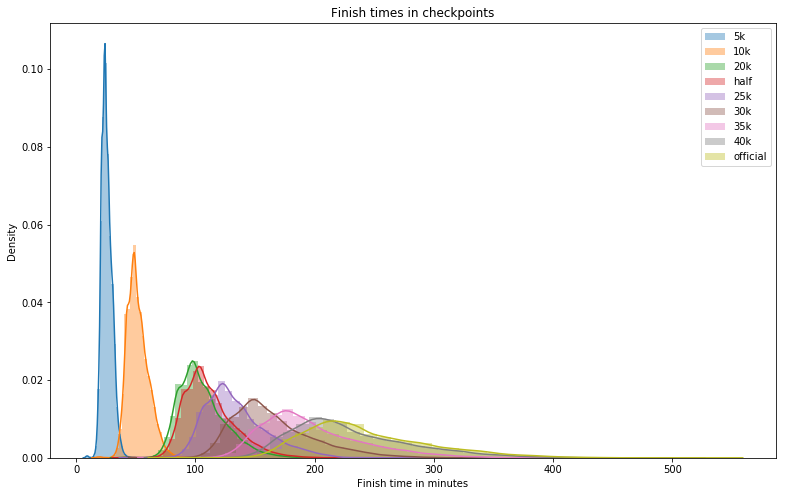

In [9]:
# Finish time across all checkpoints

plt.figure(figsize=(13,8))
for col in int_cols:
    sns.distplot(df[col], bins=40 )
    plt.legend(int_cols)
plt.xlabel('Finish time in minutes')
plt.ylabel('Density')
plt.title('Finish times in checkpoints')

plt.show()

__Observation__: We see a trend of a sharp peak, unlike of a Bell curve, appearing around 20k and smoothing out around 35k. It is possible that there is a sharp difference between men's time and women's time. 

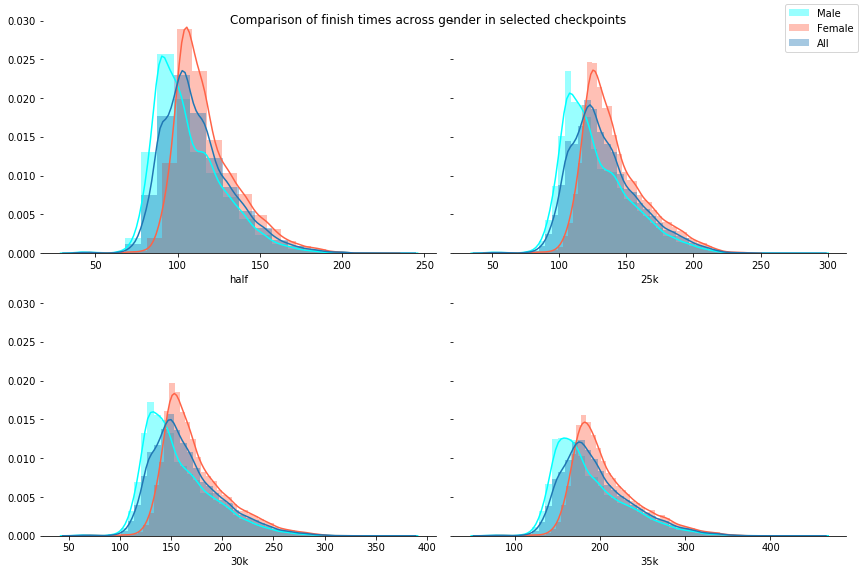

In [10]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
sns.despine(left=True)

# Half
sns.distplot(df[df.gender=='M']['half'], color='cyan', bins=20, kde=True, ax=axes[0,0])
sns.distplot(df[df.gender=='F']['half'], color='tomato', bins=20, kde=True, ax=axes[0,0])
sns.distplot(df.half, bins=20, ax=axes[0,0])

# 25k 
sns.distplot(df[df.gender=='M']['25k'], color='cyan', bins=50, kde=True, ax=axes[0,1])
sns.distplot(df[df.gender=='F']['25k'], color='tomato', bins=50, kde=True, ax=axes[0,1])
sns.distplot(df['25k'], bins=50, ax=axes[0,1])

# 30k
sns.distplot(df[df.gender=='M']['30k'], color='cyan', bins=50, kde=True, ax=axes[1,0])
sns.distplot(df[df.gender=='F']['30k'], color='tomato', bins=50, kde=True, ax=axes[1,0])
sns.distplot(df['30k'], bins=50, ax=axes[1,0])

# 35k 
sns.distplot(df[df.gender=='M']['35k'], color='cyan', bins=50, kde=True, ax=axes[1,1,])
sns.distplot(df[df.gender=='F']['35k'], color='tomato', bins=50, kde=True, ax=axes[1,1])
sns.distplot(df['35k'], bins=50, ax=axes[1,1])

#plt.setp(axes, yticks=[])
f.legend(["Male", "Female", "All"],  loc='upper right',)
f.suptitle('Comparison of finish times across gender in selected checkpoints')

plt.tight_layout()


__Observation__: In all cases where the curve showed a pointed tip, male runners are faster than female runners. The difference is still there in the upper and the lower checkpoints (i.e., official and 5k), as shown below, but the difference in the average times is not that far apart. 

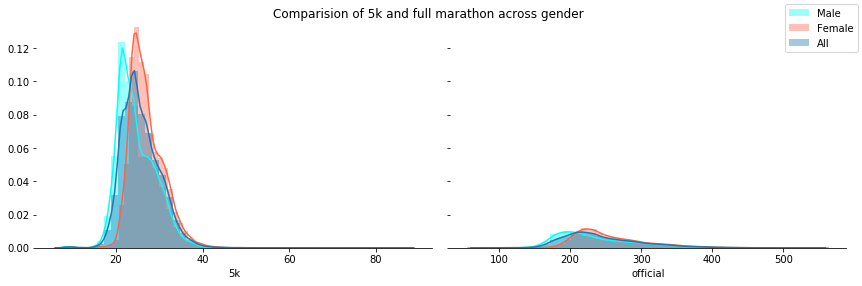

In [11]:
f, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, )
sns.despine(left=True)

sns.distplot(df[df.gender=='M']['5k'], color='cyan', bins=50, kde=True, ax=axes[0])
sns.distplot(df[df.gender=='F']['5k'], color='tomato', bins=50, kde=True, ax=axes[0])
sns.distplot(df['5k'], bins=50, kde=True, ax=axes[0])

sns.distplot(df[df.gender=='M']['official'], color='cyan', bins=50, kde=True, ax=axes[1])
sns.distplot(df[df.gender=='F']['official'], color='tomato', bins=50, kde=True, ax=axes[1])
sns.distplot(df['official'], bins=50, kde=True, ax=axes[1])

f.legend(['Male', 'Female', 'All'], loc='upper right')
f.suptitle('Comparision of 5k and full marathon across gender')
plt.tight_layout()

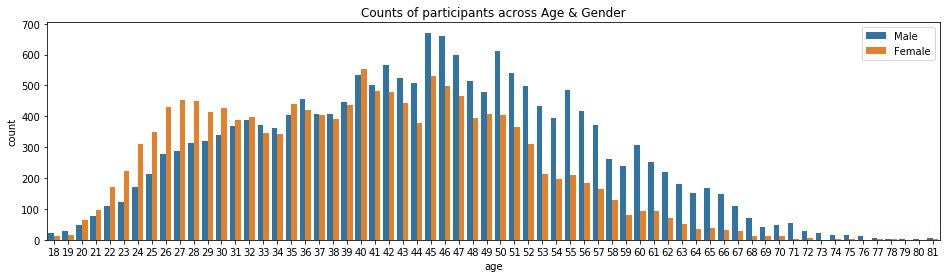

In [12]:
g = sns.countplot('age', data=df,  hue='gender')
g.figure.set_size_inches(16,4)
g.set_title("Counts of participants across Age & Gender")
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()

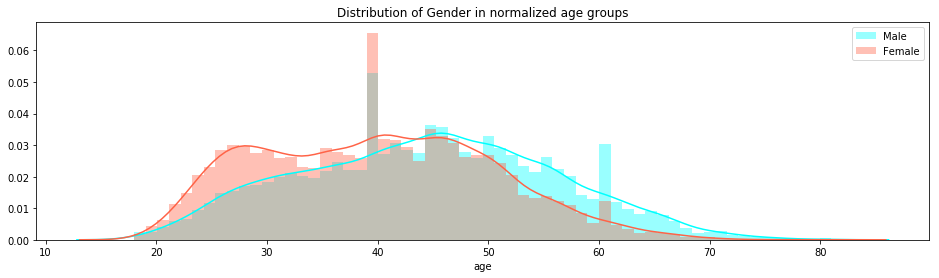

In [13]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.gender=='M']['age'], color='cyan', bins=60, kde=True)
sns.distplot(df[df.gender=='F']['age'], color='tomato', bins=60, kde=True)
#sns.distplot(df['age'],bins=60, kde=True)
plt.legend(['Male', 'Female'])
plt.title('Distribution of Gender in normalized age groups')
plt.show()

Normalization is important when there are different numbers, as in the case of  gender here in this dataset. More men than women run marathon.



Text(0.5,1,'Official finish time with age and gender')

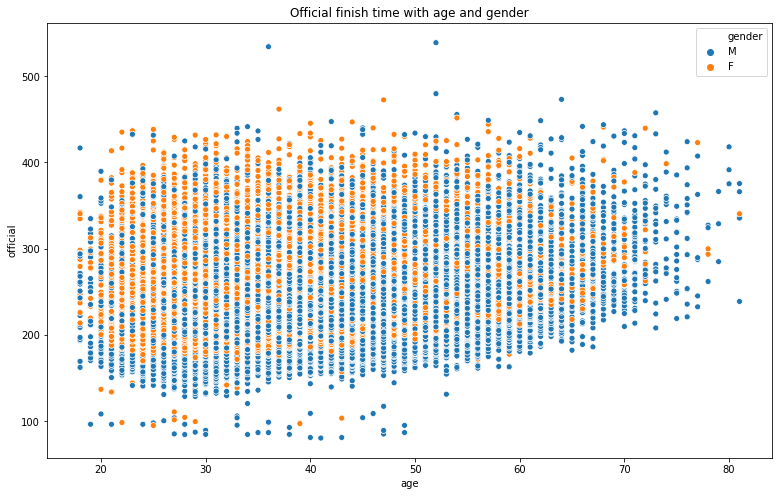

In [14]:
# Official finish time across gender and age
g = sns.scatterplot(data=df, y='official', x='age', hue='gender')
g.figure.set_size_inches(13,8)
g.set_title('Official finish time with age and gender')

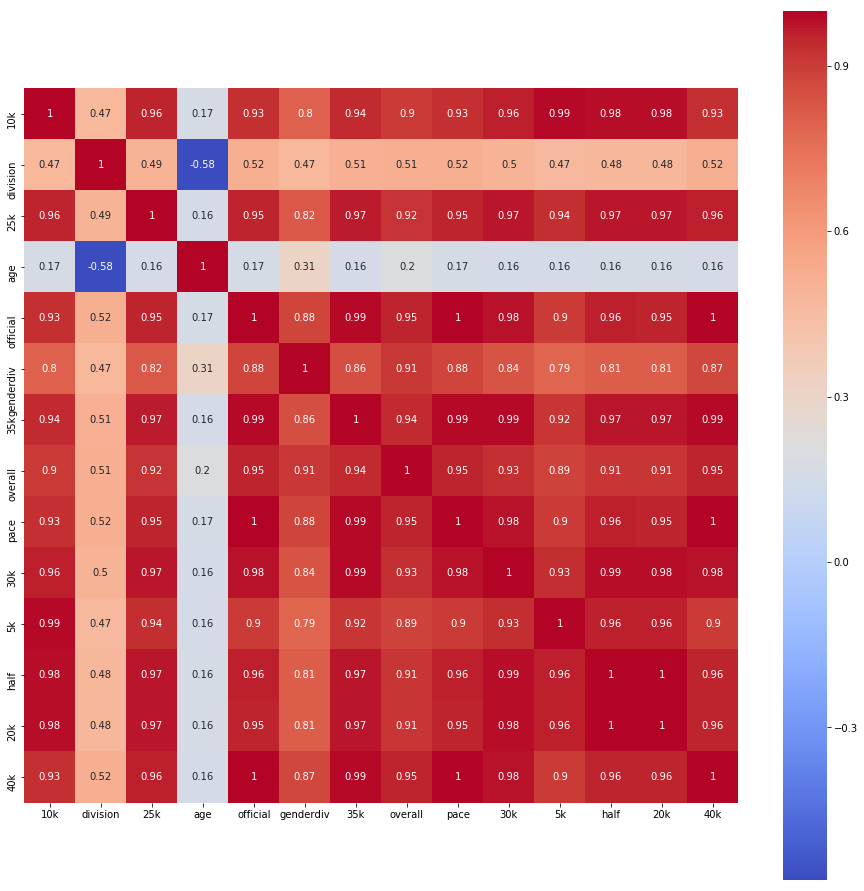

In [15]:
# Almost everything should be highly correlated

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), cmap='coolwarm', square=True, annot=True) #highly positively correlated

## Clustering

First divide the dataset into four clusters. 

In [16]:
# Make sure we have evenly distributed number of rows

rows = df.shape[0] - df.shape[0] %4
df = df.iloc[:rows, :]

In [17]:
df.shape[0]

31984

### Hypothesis

Depending on age groups and gender  participants take different times and I want to see how the clusters are formed. 

In [18]:
# Take all 

int_cols

['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']

In [19]:
df.gender = np.where(df.gender=='M', 1,0)

In [20]:
#['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k'. 'age', 'gender']


In [21]:
# Break into a set of features and a variable for the known outcome. 
# y - trying to understand what sort clusters can be formed from the variable you can choose whatever you want to see. 

X = df[int_cols]
y = df.gender

In [22]:
# Normalize, for PCA as it requires normalization 

X_norm = normalize(X)

# Create the two-feature PCA for graphing 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [23]:
# Split the data into four equally-sized samples. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

#make sure it worked
print('should all be True:',
      len(X1) == len(X_pca1),
      len(X2) == len(X_pca2),
      len(X3) == len(X_pca3),
      len(X4) == len(X_pca4))

should all be True: True True True True


In [24]:
#X_pca[:,0]

In [25]:
#X_pca1

In [26]:
# Create dataframe to hold ypreds



## K-Means

In [41]:
# Create dataframe to hold ypreds
ypred = pd.DataFrame()
sil_scores = pd.DataFrame(columns=['cluster', 'sil_score'])

# K-means
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    print(counter)
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    
    for nclust in range(2, 7):
        model = KMeans(n_clusters=nclust, random_state=42)
        pred = model.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

        #Silhouette scores 
        labels = model.labels_
        sil_score = metrics.silhouette_score(data[0],
                                             labels,
                                             metric='euclidean')
        sil_scores = sil_scores.append({
            'cluster':'clust' + str(nclust) + '_sample' + str(counter), 
            'sil_score':sil_score},
            ignore_index=True)

0
1
2
3


In [42]:
sil_scores.sort_values(by='sil_score', ascending=False)

,cluster,sil_score
0,clust2_sample0,0.518275
10,clust2_sample2,0.518140
5,clust2_sample1,0.515591
15,clust2_sample3,0.514729
11,clust3_sample2,0.447062
16,clust3_sample3,0.446754
1,clust3_sample0,0.445985
6,clust3_sample1,0.431704
18,clust5_sample3,0.404849
8,clust5_sample1,0.400707


In [43]:
#ypred.head(20)

In [44]:
ypred.head()

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,clust3_sample0,clust4_sample0,clust5_sample0,clust6_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,...,clust4_sample2,clust5_sample2,clust6_sample2,pca_f1_sample3,pca_f2_sample3,clust2_sample3,clust3_sample3,clust4_sample3,clust5_sample3,clust6_sample3
0,-0.020873,-0.000959,1,1,1,3,0,-0.016757,0.004846,1,...,0,3,4,0.007782,0.000464,1,1,3,3,1
1,-0.007482,0.001389,1,1,3,0,3,0.007062,0.007875,1,...,2,0,4,-0.004132,0.003846,0,0,3,3,0
2,-0.011737,-0.000764,1,1,1,3,3,0.028105,-0.006599,0,...,2,0,1,-0.014806,0.008332,0,0,0,0,3
3,0.014460,-0.003988,0,0,0,1,2,-0.009800,-0.000236,1,...,0,3,0,-0.006746,0.004441,0,0,3,3,0
4,0.025402,-0.009334,0,0,0,1,2,-0.014207,0.001249,1,...,3,1,0,0.012483,0.008532,1,1,3,3,1


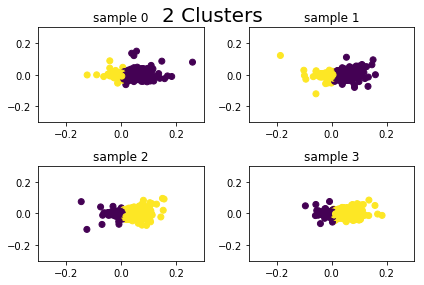

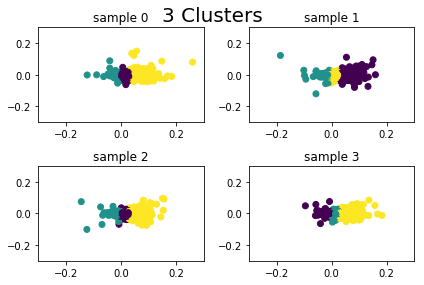

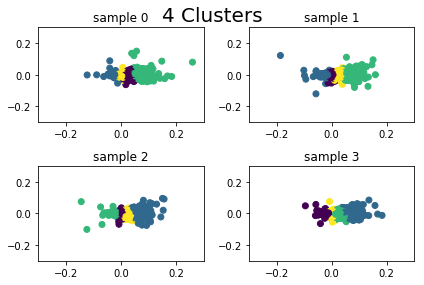

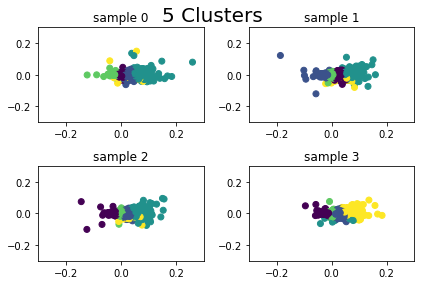

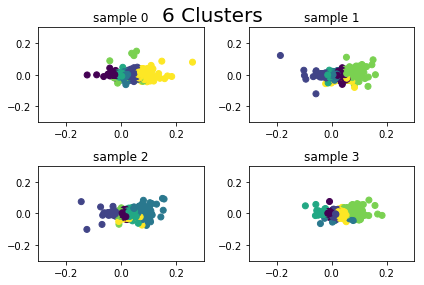

In [31]:
# For each cluster, plot the clusters using the PCA 
# pca features for each sample.
for cluster in range(2, 7):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features. PCA components 
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments. coloring to the assignment of the cluster
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

## Mean-shift

In [32]:
ypred = pd.DataFrame()
sil_scores = pd.DataFrame(columns = ['cluster', 'sil_score', 'quantile'])

for counter, data in enumerate([X1, X2, X3, X4]):
    #iterate through possible quantiles for cluster solutions
    for quantile in [0.1, 0.2, 0.3, 0.4, 0.5]:
        bandwidth = estimate_bandwidth(data, quantile=quantile, n_samples=500)
        model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = model.fit_predict(data)
        labels = model.labels_
        nclust = len(np.unique(labels))
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        sil_score = metrics.silhouette_score(data, labels, metric='euclidean')
        sil_scores = sil_scores.append({
            'cluster':'clust' + str(nclust) + '_sample' + str(counter), 
            'sil_score':sil_score,
            'quantile':quantile},
            ignore_index=True)

In [33]:
sil_scores.sort_values(by='sil_score', ascending=False)

,cluster,sil_score,quantile
4,clust28_sample0,0.458916,0.5
9,clust36_sample1,0.405530,0.5
3,clust39_sample0,0.366144,0.4
12,clust51_sample2,0.363850,0.3
14,clust32_sample2,0.341863,0.5
8,clust44_sample1,0.340966,0.4
2,clust53_sample0,0.317328,0.3
13,clust44_sample2,0.312452,0.4
17,clust54_sample3,0.276830,0.3
19,clust30_sample3,0.276679,0.5


KeyError: 'pca_f1_sample0'

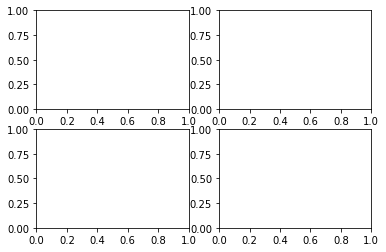

In [34]:
# pca features for each sample.
for cluster in range(2, 7):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features. PCA components 
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments. coloring to the assignment of the cluster
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

## Spectral Clustering

In [35]:
#set df for predictions
ypred = pd.DataFrame()
sil_scores = pd.DataFrame(columns = ['cluster', 'sil_score'])

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    #cluster predictions for clusters 2 to 6.
    for nclust in range(2, 7):
        model = SpectralClustering(n_clusters=nclust)
        pred = model.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        #silhouette scores
        labels = model.labels_
        sil_score = metrics.silhouette_score(data[0],
                                             labels,
                                             metric='euclidean')
        sil_scores = sil_scores.append({
            'cluster':'clust' + str(nclust) + '_sample' + str(counter), 
            'sil_score':sil_score},
            ignore_index=True)

In [36]:
sil_scores.sort_values(by='sil_score', ascending=False)

,cluster,sil_score
0,clust2_sample0,0.518700
10,clust2_sample2,0.518515
5,clust2_sample1,0.515533
15,clust2_sample3,0.514525
6,clust3_sample1,0.440342
11,clust3_sample2,0.436072
16,clust3_sample3,0.423755
2,clust4_sample0,0.422117
1,clust3_sample0,0.421155
13,clust5_sample2,0.416696


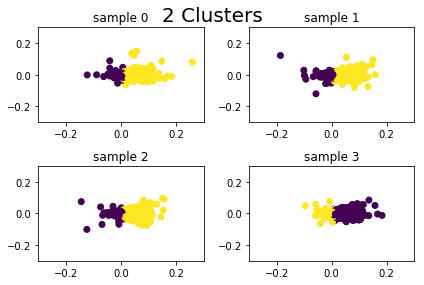

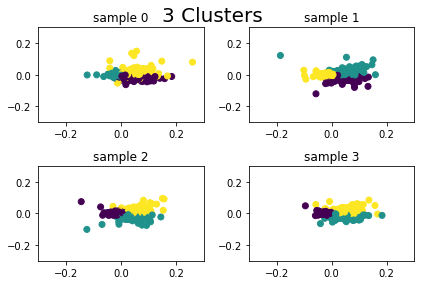

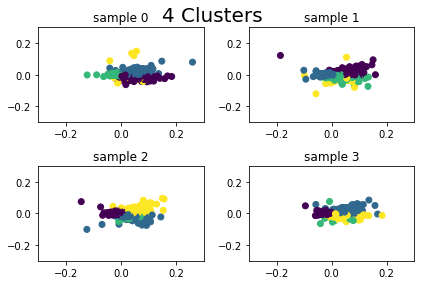

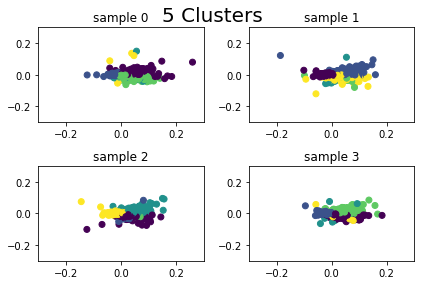

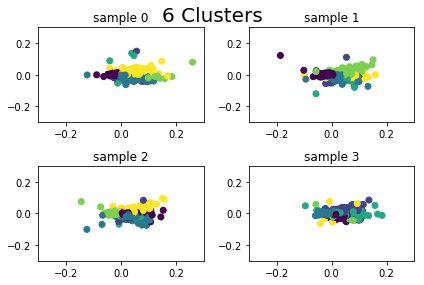

In [37]:
# pca features for each sample.
for cluster in range(2, 7):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features. PCA components 
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments. coloring to the assignment of the cluster
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [51]:
Xd = pd.concat([X, df.gender, df.age], axis=1)

In [52]:
Xd.shape

(31984, 11)

In [54]:
Xd.head()

,5k,10k,20k,half,25k,30k,35k,40k,official,gender,age
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,1,47
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,0,33
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,1,41
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,0,24
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,1,40


In [56]:
# Running PCA K-Means with n_cluster = 3 on data

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Xd)
km_pred = kmeans.predict(Xd)

In [61]:
Xd['pred'] = km_pred

In [64]:
import seaborn as sns

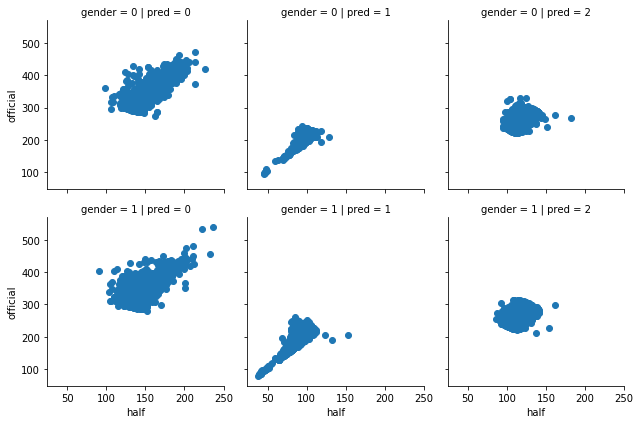

In [70]:
g = sns.FacetGrid(Xd, col='pred',row= 'gender' )
g = g.map(plt.scatter, 'half', 'official')

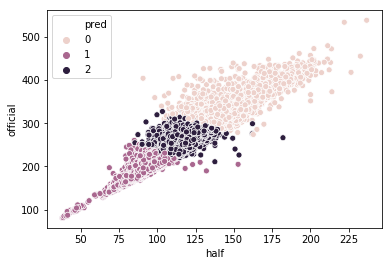

In [73]:
sns.scatterplot(Xd.half, Xd.official, hue=Xd.pred)

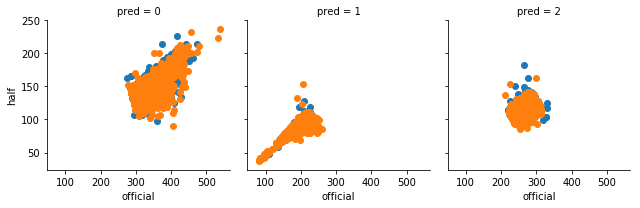

In [95]:
g = sns.FacetGrid(Xd, col='pred', hue='gender')
g = g.map(plt.scatter, 'official', 'half')


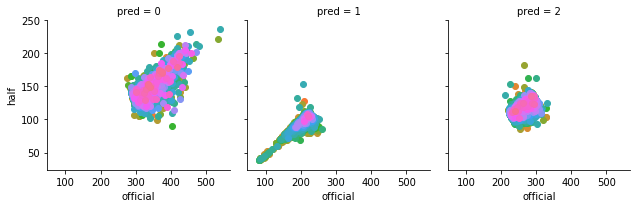

In [94]:
g = sns.FacetGrid(Xd, col='pred', hue='age')
g = g.map(plt.scatter, 'official', 'half')


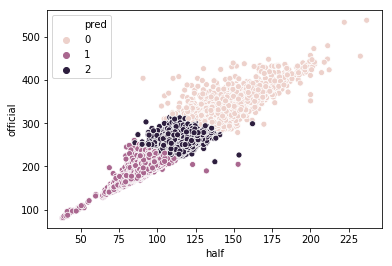

In [84]:
sns.scatterplot(Xd[Xd.gender==1].half, Xd[Xd.gender==1].official, hue=Xd.pred)


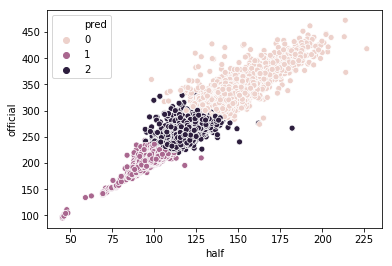

In [83]:
sns.scatterplot(Xd[Xd.gender==0].half, Xd[Xd.gender==0].official, hue=Xd.pred)

In [75]:
# Break into a set of features and a variable for the known outcome. 
# y - trying to understand what sort clusters can be formed from the variable you can choose whatever you want to see. 

# Normalize, for PCA as it requires normalization 

X_norm = normalize(Xd)

# Create the two-feature PCA for graphing 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

#make sure it worked
print('should all be True:',
      len(X1) == len(X_pca1),
      len(X2) == len(X_pca2),
      len(X3) == len(X_pca3),
      len(X4) == len(X_pca4))

#X_pca[:,0]

#X_pca1

# Create dataframe to hold ypreds



## K-Means

# Create dataframe to hold ypreds
ypred = pd.DataFrame()
sil_scores = pd.DataFrame(columns=['cluster', 'sil_score'])

# K-means
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    print(counter)
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    
    for nclust in range(2, 7):
        model = KMeans(n_clusters=nclust, random_state=42)
        pred = model.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

        #Silhouette scores 
        labels = model.labels_
        sil_score = metrics.silhouette_score(data[0],
                                             labels,
                                             metric='euclidean')
        sil_scores = sil_scores.append({
            'cluster':'clust' + str(nclust) + '_sample' + str(counter), 
            'sil_score':sil_score},
            ignore_index=True)

should all be True: True True True True
0
1
2
3


km = KMeans(n_clusters=3)

In [89]:
km.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
predd = km.predict(Xd)

In [98]:
Xd.shape

(31984, 11)

In [93]:
pd.crosstab(Xd.gender, km.labels_)

col_0,0,1,2
gender,,,
0,4828,2836,6703
1,9968,2415,5234


In [102]:
Xd_pred = pd.concat([Xd, pd.Series(predd)], axis=1)

In [112]:
Xd_pred.0

SyntaxError: invalid syntax (<ipython-input-112-59657174a8e2>, line 1)

In [47]:
# k = 2

X.head()

,5k,10k,20k,half,25k,30k,35k,40k,official
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: gender, dtype: int64

In [59]:
k_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)

In [60]:
X['k_means'] = k_pred

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
X['gender'] = y

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
# distribution of the gender with how many 
# cluster on the times and now use the clusters to find out how they fall within each category 
# compare the age ratio or the gender ratios between the clusters 

# once the clusters 

# only time data cluster , does the cluster corresponds to gender or 
# in the USL, we are tryong to find the cluseters and the distri of the cluster with some variable that it hasn't sen, and 
# what we see wrt the variable (e.g., gender, age-group) and build the story around it. 
# decide how you want to tell the story. 


# further steps: 

In [68]:
plt.scatter(df.official)

TypeError: scatter() missing 1 required positional argument: 'y'

In [69]:
sns.scatterplot(data=X, x='k-means', hue='gender')

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555


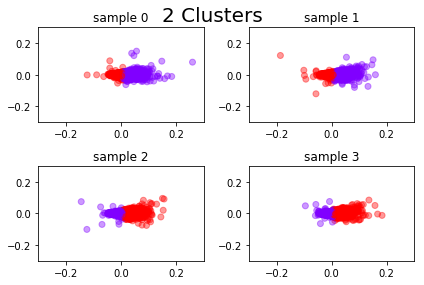



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462


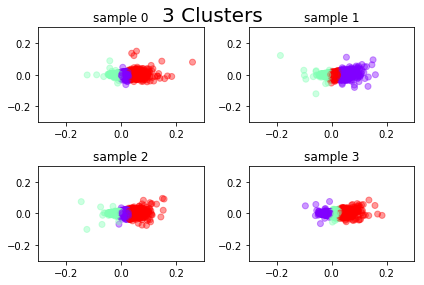



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799


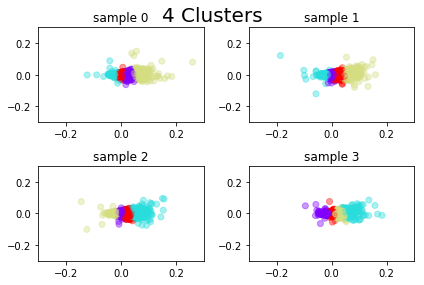



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103


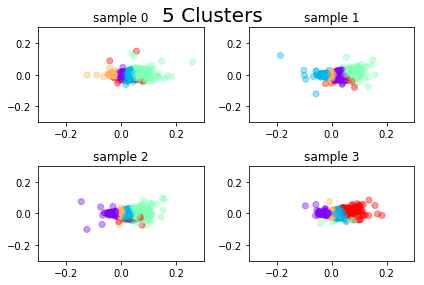



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621


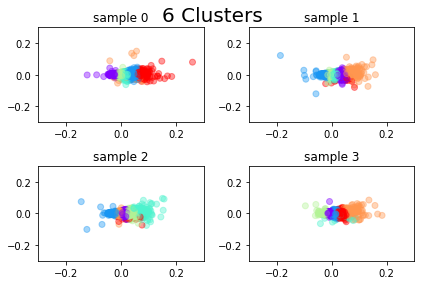



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267


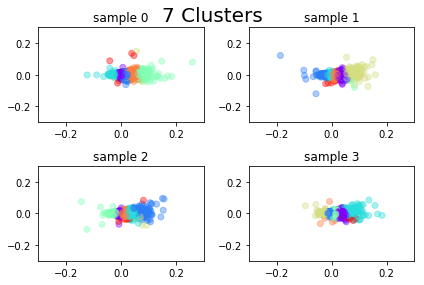



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949


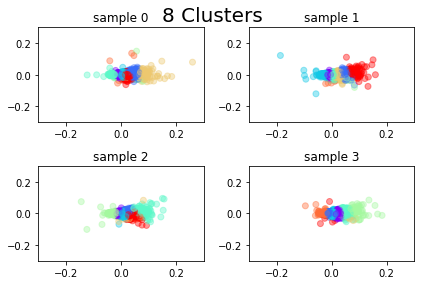



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701


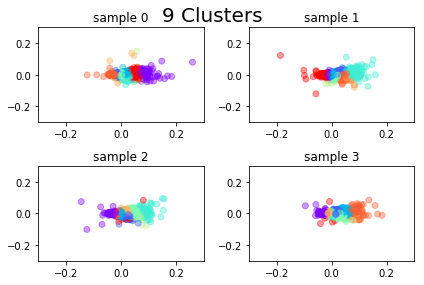



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701
8      10.0    0.312498  0.003773


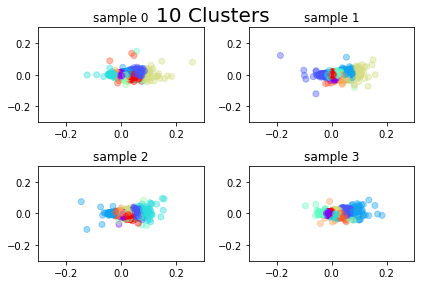



scores:
   clusters  mean score       std
0       2.0    0.516684  0.001555
1       3.0    0.442876  0.006462
2       4.0    0.391273  0.005799
3       5.0    0.398339  0.005103
4       6.0    0.359254  0.003621
5       7.0    0.359550  0.004267
6       8.0    0.332162  0.006949
7       9.0    0.318282  0.001701
8      10.0    0.312498  0.003773
9      11.0    0.306830  0.006208


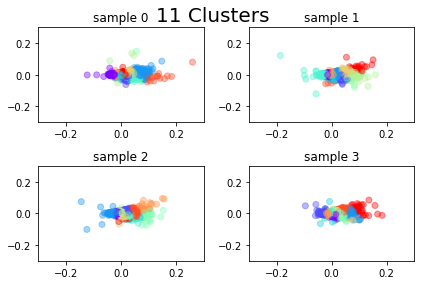



sorted cluster scores:


AttributeError: 'DataFrame' object has no attribute 'sort'

In [70]:

# Create function for clustering 
def evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, clust_range):

    #save clusters in dfs
    plot_clusters = pd.DataFrame()
    cluster_scores = pd.DataFrame(columns=['clusters','mean score','std'])

    # plot each cluster against the corresponding PCA
    for index, data in enumerate([
        (X1, X_pca1),
        (X2, X_pca2),
        (X3, X_pca3),
        (X4, X_pca4)]):

        # Save values in the dataframe created
        plot_clusters['pca_f1' + '_sample' + str(index)] = data[1][:, 0]
        plot_clusters['pca_f2' + '_sample' + str(index)] = data[1][:, 1]

        # Create k-means, n_clusters with user input, get silhouette score and save in the same dataframe as the clusters
        for nclust in range(2, clust_range):
            km = KMeans(n_clusters=nclust, random_state=42)
            km.fit(data[0])
            labels = km.labels_
            cluster_pred = km.predict(data[0])
            plot_clusters['clust' + str(nclust) + '_sample' + str(index)] = cluster_pred
            plot_clusters['sil_score_' + 'clust'+ str(nclust) + '_sample' + str(index)] = \
                                metrics.silhouette_score(data[0], labels, metric='euclidean')

    # visualization
    for nclust in range(2, clust_range):

        # Assign colors and make a grid of subplots 
        colors = cm.rainbow(np.linspace(0, 1, nclust))
        f, plotgrid = plt.subplots(2, 2)
        sil_scores = []

        # Make a plot for each sample 
        for i in range(4):

            current_group = (f'clust{nclust}_sample{i}')

            x_plot = plot_clusters[f'pca_f1_sample{i}']
            y_plot = plot_clusters[f'pca_f2_sample{i}']

            # Cluster assignments
            c = plot_clusters[current_group]

            # Assign the plot to its subgrid/place on the plot
            rows = int(np.floor(i / 2))
                # 0,0,1,1
            cols = i % 2
                # 0,1,0,1

            plotgrid[rows, cols].scatter(x_plot, y_plot, color = colors[c], alpha = 0.4)
            plotgrid[rows, cols].set_title(f'sample {i}')
            plotgrid[rows, cols].set_xlim([-.3, .3])
            plotgrid[rows, cols].set_ylim([-.3, .3])

            sil_score = plot_clusters['sil_score_' + str(current_group)].mean()
            sil_scores.append(sil_score)

        group_sil_scores_mean = np.mean(sil_scores)
        group_sil_scores_std = np.std(sil_scores)
        cluster_scores = cluster_scores.append({'clusters':int(nclust), 'mean score': group_sil_scores_mean, 'std': group_sil_scores_std}, ignore_index=True)
        print('scores:')
        print(cluster_scores)

        plt.suptitle(f'{nclust} Clusters', fontsize=20)
        plt.tight_layout()
        plt.show()
        print('\n')
    
    print('sorted cluster scores:')
    sorted_scores = cluster_scores.sort(columns = 'mean score', ascending = False)
    print(sorted_scores)

    best_cluster_num = int(sorted_scores['clusters'].iloc[0])
    print('best cluster num:')
    print(best_cluster_num)
    
    return best_cluster_num
    
continuous2014_best_cluster_num = evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, 12)

In [ ]:
print(X1)

In [ ]:
# Break into a set of features and a variable for the known outcome. 
# y - trying to understand what sort clusters can be formed from the variable you can choose whatever you want to see. 

X = df[int_cols]
y = df.half

# Normalize

X_norm = normalize(X)

# Create the two-feature PCA for graphing 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

In [ ]:
evaluate_kmeans(X1, X_pca1, X2, X_pca2, X3, X_pca3, X4, X_pca4, 6)